<a href="https://colab.research.google.com/github/cybermin/2022_BSSM/blob/main/05_codelab2_urllib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


일별 박스오피스 API 서비스를 이용하여 2020년12월1일~31일 일별박스 오피스 자료를 분석하시오.

+ https://www.kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do
---

In [1]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

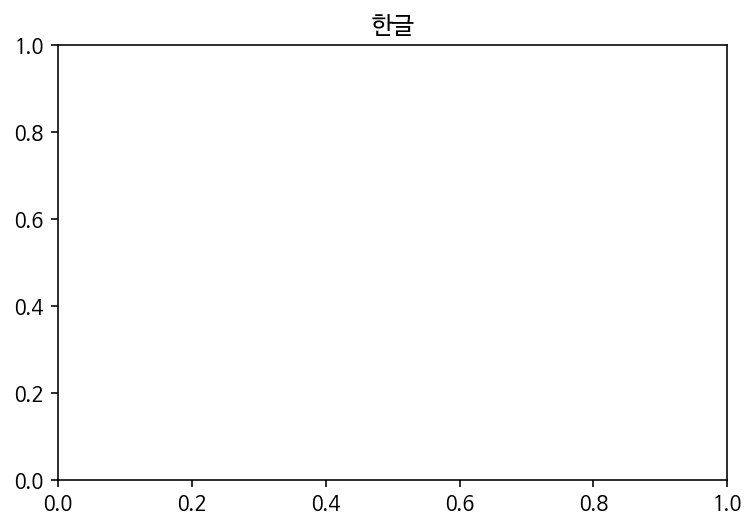

In [3]:
plt.title('한글')
plt.show()

#urllib 모듈
+ URL과 웹 요청에 관련된 모듈들 패키지로 묶어 제공

## urllib.request 모듈
* 웹 페이지 요청 및 데이터를 가져올 수 있음

### urllib.request.urlopen(url, data)
* 웹 서버에 정보를 요청한 후, 돌려받은 응답을 저장하여 ‘**응답 객체(HTTPResponse)**’를 반환
* data는 서버로 전송할 추가 데이터를 지정하는 객체
* 반환된 응답 객체:  read() 메서드를 실행
   - 웹 서버가 응답한 데이터를 바이트 배열로 읽어들임
   - 읽어들인 바이트 배열 : 이진수로 이루어진 수열이어서 **텍스트 형식의 데이터를 decode('utf-8') 메서드를 실행하여 문자열로 변환**

* 참고) **Byte 데이터**
  + 1바이트(0~255사이 코드)로 표현되는 문자 표현
  + 문자열에서 사용하는 연산을 거의 제공
    - 인덱싱/슬라이싱, in, Upper(), Split()
  + 지원 메소드
    - **decode(인코딩값)** : 바이트->문자열로 변환  
    - **encode()** : 문자열->바이트로 변환  


### urllib.request.Request(url, headers={})
* POST방식으로 데이터를 보내려고 할 경우 
  + URL : 요청 주소
  * headers : 딕셔너리형태의 헤더

+ 2021년 12월 1일에서 31일까지 일일박스오프자료를 추출해서 CSV저장

In [ ]:
from urllib.request import Request, urlopen
import json  

In [ ]:
url = 'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=20220103'

In [ ]:
rsp = urlopen(url).read().decode('utf-8')
rsp

In [ ]:
#json형태의 문자열 dict형태로 변경
mvdt = json.loads(rsp)
type(mvdt)

dict

In [ ]:
mvlt = mvdt['boxOfficeResult']['dailyBoxOfficeList']
type(mvlt)

list

In [ ]:
for item in mvlt:
  d = mvdt['boxOfficeResult']["showRange"][:4] + '-' + mvdt['boxOfficeResult']["showRange"][4:6] +'-'+ mvdt['boxOfficeResult']["showRange"][6:8]
  print( d, item["rank"], item['movieNm'], item['audiCnt'] , item['audiAcc'])

2022-01-03 1 스파이더맨: 노 웨이 홈 66799 6141100
2022-01-03 2 킹스맨: 퍼스트 에이전트 23748 800139
2022-01-03 3 해피 뉴 이어 10181 196396
2022-01-03 4 매트릭스: 리저렉션 1843 204748
2022-01-03 5 드라이브 마이 카 1105 23696
2022-01-03 6 신데렐라 2: 마법에 걸린 왕자 1022 36771
2022-01-03 7 엔칸토: 마법의 세계 897 627528
2022-01-03 8 램 533 11058
2022-01-03 9 괴짜들의 로맨스 350 8101
2022-01-03 10 씽2게더 267 557


---

# **해결문제**


일별 박스오피스 API 서비스를 이용하여 2020년12월1일~31일 일별박스 오피스 자료를 분석하시오.

+ https://www.kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
list(range(1,32))

In [8]:
#파이썬 반복문 
for i  in range(1,32) :
  print(i, end=' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 

In [9]:
#1~31까지 숫자를 2자리 문자열로 만들기 
for i  in range(1,32) :
  if i < 10 : n = '0' + str(i)
  else : n = str(i)

  print(n, end=' ')

01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 

In [11]:
#1~31까지 숫자를 2자리 문자열로 만들기 : 파이썬 포멧
for i  in range(1,32) :
  #n = '{:02d}'.format(i)
  n = f'{i:02d}'

  print(n, end=' ')

01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 

In [18]:
from urllib.request import Request, urlopen
import json 

In [19]:
#함수 
def mvApi(n) :
  #url =  'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=202112' + n
  url =  'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?'
  url = url + 'key=' + 'f5eef3421c602c6cb7ea224104795888'
  url = url + '&targetDt=202112' + n

  resp = urlopen(url).read().decode('utf-8')
  mvdt = json.loads(resp)

  boxOfficeResult = mvdt['boxOfficeResult']

  showRange = boxOfficeResult['showRange']

  return showRange

In [20]:
for i  in range(1,2) :
  n = f'{i:02d}'
  url = mvApi(n)

  print(url)

20211201~20211201
20211202~20211202
20211203~20211203
20211204~20211204
20211205~20211205
20211206~20211206
20211207~20211207
20211208~20211208
20211209~20211209
20211210~20211210
20211211~20211211
20211212~20211212
20211213~20211213
20211214~20211214
20211215~20211215
20211216~20211216
20211217~20211217
20211218~20211218
20211219~20211219
20211220~20211220
20211221~20211221
20211222~20211222
20211223~20211223
20211224~20211224


KeyboardInterrupt: ignored